In [1]:
#Importing the Libraries

import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
all_data = pd.read_csv("HDFCBANK.csv")
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11
1,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12
2,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12
3,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12
4,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12


In [3]:
Close_list = all_data['Close'].tolist()
total=len(Close_list);


In [4]:
j=0
j=0
D1=[]
D2=[]
D3=[]
D4=[]
D5=[]
D6=[]
D7=[]
D8=[]
DIFF=[]
PERCDIFF=[]
TARGET=[]
for i in range(0,total):
  D1.append(Close_list[j])
  D2.append(Close_list[j+1])
  D3.append(Close_list[j+2])
  D4.append(Close_list[j+3])
  D5.append(Close_list[j+4])
  D6.append(Close_list[j+5])
  D7.append(Close_list[j+6])
  D8.append(Close_list[j+7])
  diff=Close_list[j+7]-Close_list[j+6]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[j+7]
  PERCDIFF.append(percdiff)
  if(percdiff>1.5):
    TARGET.append('pos')
  elif(percdiff<-1.5):
    TARGET.append('neg')
  else:
    TARGET.append('neu')
  j=j+1;
  if(j==total-7):
    break

In [5]:
df1=pd.DataFrame(D1)
df2=pd.DataFrame(D2)
df3=pd.DataFrame(D3)
df4=pd.DataFrame(D4)
df5=pd.DataFrame(D5)
df6=pd.DataFrame(D6)
df7=pd.DataFrame(D7)
df8=pd.DataFrame(D8)
df9=pd.DataFrame(DIFF)
df10=pd.DataFrame(PERCDIFF)
df11=pd.DataFrame(TARGET)
df=pd.DataFrame()
df['Close']=all_data['Close']
df['D1']=df1
df['D2']=df2
df['D3']=df3
df['D4']=df4
df['D5']=df5
df['D6']=df6
df['D7']=df7
df['D8']=df8
df['DIFF']=df9
df['PERCDIFF']=df10
df['TARGET']=df11
df.dropna(inplace=True)
df.head(10)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,DIFF,PERCDIFF,TARGET
0,293.50,293.50,304.05,292.80,296.45,286.55,287.20,283.85,285.60,1.75,0.612745,neu
1,304.05,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,-1.75,-0.616523,neu
2,292.80,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,2.70,0.942244,neu
3,296.45,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,15.65,5.178690,pos
4,286.55,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,3.55,1.161079,neu
5,287.20,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,-0.50,-0.163800,neu
6,283.85,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,-13.90,-4.770894,neg
7,285.60,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,8.20,2.737439,pos
8,283.85,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,-6.50,-2.218052,neg
9,286.55,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,10.10,3.331684,pos


In [6]:
features = ['D1','D2','D3','D4','D5','D6']
df1=df[features]
df1['TARGET']=df['TARGET']
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,D1,D2,D3,D4,D5,D6,TARGET
0,293.50,304.05,292.80,296.45,286.55,287.20,neu
1,304.05,292.80,296.45,286.55,287.20,283.85,neu
2,292.80,296.45,286.55,287.20,283.85,285.60,neu
3,296.45,286.55,287.20,283.85,285.60,283.85,pos
4,286.55,287.20,283.85,285.60,283.85,286.55,neu


In [7]:
df0=pd.DataFrame()
df0['TARGET']= np.where(df1['TARGET']=='pos','1',(np.where(df['TARGET']=='neg','-1','0')))

df0.head()
df0.groupby('TARGET').size()

,TARGET
0,0
1,0
2,0
3,1
4,0


TARGET
-1    1016
0     3442
1     1112
dtype: int64

#Explore the class distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'TARGET')

Text(0.5, 1.0, 'Number of positive negative and neutral messages')

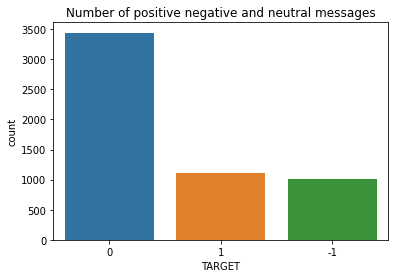

In [8]:
sns.countplot(df0['TARGET'])
plt.xlabel('TARGET')
plt.title('Number of positive negative and neutral messages')

In [9]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df1.columns:
  if df1[col].dtype=='object':
    df1[col]=pd.Categorical(df1[col]).codes
df1.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,D1,D2,D3,D4,D5,D6,TARGET
0,293.50,304.05,292.80,296.45,286.55,287.20,1
1,304.05,292.80,296.45,286.55,287.20,283.85,1
2,292.80,296.45,286.55,287.20,283.85,285.60,1
3,296.45,286.55,287.20,283.85,285.60,283.85,2
4,286.55,287.20,283.85,285.60,283.85,286.55,1
...,...,...,...,...,...,...,...
95,501.90,486.40,473.00,483.30,541.30,543.65,2
96,486.40,473.00,483.30,541.30,543.65,478.45,2
97,473.00,483.30,541.30,543.65,478.45,496.35,2
98,483.30,541.30,543.65,478.45,496.35,525.35,0


In [10]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df1[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform)
feature_transform.head()

,D1,D2,D3,D4,D5,D6
0,0.003332,0.006974,0.003090,0.004350,0.000932,0.001157
1,0.006974,0.003090,0.004350,0.000932,0.001157,0.000000
2,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604
3,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000
4,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932


In [11]:
x=feature_transform
x.head()
y=df1['TARGET']
y.head()

,D1,D2,D3,D4,D5,D6
0,0.003332,0.006974,0.003090,0.004350,0.000932,0.001157
1,0.006974,0.003090,0.004350,0.000932,0.001157,0.000000
2,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604
3,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000
4,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932


0    1
1    1
2    1
3    2
4    1
Name: TARGET, dtype: int8

In [12]:
#create test and train data 70% and 30% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
train_x.shape
test_x.shape
train_x.shape
train_y.shape

(3899, 6)

(1671, 6)

(3899, 6)

(3899,)

In [13]:
#BUILD A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
log = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight = 'balanced')

In [14]:
log.fit(train_x,train_y)

LogisticRegression(class_weight='balanced', max_iter=500, multi_class='ovr',
                   tol=1e-05)

In [15]:
#GENERATE MODEL DIAGNOSTICS
classes=log.predict(test_x)
print(classes.size)

1671


In [16]:
print("positive cases in test data:",test_y[test_y==1].shape[0])
print("Negative cases in Test Data:",test_y[test_y==0].shape[0])

positive cases in test data: 1021
Negative cases in Test Data: 294


# **ACCURACY SCORE-LOGISTIC REGRESSION class_weight = 'balanced'**

In [17]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.40933572710951527


In [18]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.16      0.34      0.22       294
           1       0.61      0.53      0.56      1021
           2       0.27      0.13      0.17       356

    accuracy                           0.41      1671
   macro avg       0.34      0.33      0.32      1671
weighted avg       0.46      0.41      0.42      1671



CONFUSION MATRIX


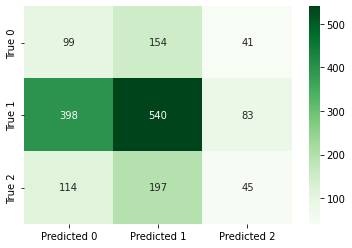

In [19]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [20]:
#BUILD A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
log = lm.LogisticRegression(penalty='l2',fit_intercept=True,max_iter=500,solver='lbfgs',tol=1e-5,multi_class='ovr',class_weight=None)

In [21]:
log.fit(train_x,train_y)

LogisticRegression(max_iter=500, multi_class='ovr', tol=1e-05)

In [22]:
#GENERATE MODEL DIAGNOSTICS
classes=log.predict(test_x)
print(classes.size)

1671


In [23]:
print("positive cases in test data:",test_y[test_y==1].shape[0])
print("Negative cases in Test Data:",test_y[test_y==0].shape[0])

positive cases in test data: 1021
Negative cases in Test Data: 294


# **ACCURACY SCORE-LOGISTIC REGRESSION class_weight=None**

In [24]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.6104129263913824


In [25]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.61      1.00      0.76      1021
           2       0.00      0.00      0.00       356

    accuracy                           0.61      1671
   macro avg       0.20      0.33      0.25      1671
weighted avg       0.37      0.61      0.46      1671



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX


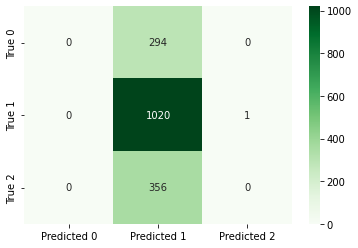

In [26]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [27]:
#FIND OUT PROBABLITY PF THE CLASSES AND PREDICTED CLASSES
predicted_prob=log.predict_proba(test_x)
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_classes_df=pd.DataFrame(classes)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df],axis=1)
predicted_df.columns=['prob_0','prob_1','prob_2','class']
predicted_df.sample(10)

,prob_0,prob_1,prob_2,class
1003,0.168519,0.637960,0.193520,1
1120,0.194676,0.615347,0.189977,1
621,0.171134,0.636512,0.192355,1
1652,0.162649,0.645852,0.191499,1
868,0.197297,0.605790,0.196913,1
1323,0.211071,0.585765,0.203164,1
1105,0.179764,0.625577,0.194659,1
1050,0.173289,0.635503,0.191208,1
1052,0.162886,0.644160,0.192954,1
636,0.180719,0.631402,0.187879,1


In [28]:
predicted_df.groupby('class').size()

class
1    1670
2       1
dtype: int64

In [29]:
#APPLY NEW THRESHOLD FOR OPTIMIZING PRECISION AND RECALL
new_y_test=predicted_prob[:,1]>=0.35
print(metrics.classification_report(test_y,new_y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.61      1.00      0.76      1021
           2       0.00      0.00      0.00       356

    accuracy                           0.61      1671
   macro avg       0.20      0.33      0.25      1671
weighted avg       0.37      0.61      0.46      1671



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**ACCURACY SCORE-LOGISTIC REGRESSION APPLYING NEW THRESHOLD FOR OPTIMIZING PRECISION AND RECALL**

In [30]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,new_y_test))

ACCUIRACY SCORE
0.6110113704368642


In [31]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,new_y_test))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.61      1.00      0.76      1021
           2       0.00      0.00      0.00       356

    accuracy                           0.61      1671
   macro avg       0.20      0.33      0.25      1671
weighted avg       0.37      0.61      0.46      1671



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX


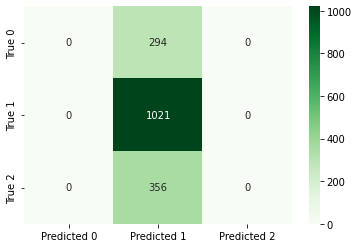

In [32]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,new_y_test)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [33]:
!jupyter nbconvert HDFCpercdiff_1_5_SMP_LR.ipynb

[NbConvertApp] Converting notebook HDFCpercdiff_1_5_SMP_LR.ipynb to html
[NbConvertApp] Writing 417246 bytes to HDFCpercdiff_1_5_SMP_LR.html
